### P.S: All libraries and functions used in this notebook are contained in modules.py file.

## Classifying a given Silhouette as one of four types of Vehicle, using a set of features extracted from the Silhouette.

The purpose of this task is to be able to train a model that can classify a given silhouette as one of the four types of vehicles contained in the dataset. The four model vehicles used for this experiment are namely; a double decker bus (bus), Cheverolet van (van), Saab 9000 (saab) and an Opel Manta 400 (opel). 

In [1]:
import modules as mod  # import all modules and functions

In [2]:
# first time run only, install tabletext to be used in generating a table later in this module.
!pip install tabletext

### Accessing the vehicles.csv dataset using its path, variable name assigned is "vehicles".

In [3]:
vehicles = mod.pd.read_csv("./../../datasets/vehicles.csv")

### `.head()` prints out the first five rows of the vehicles dataset

In [4]:
vehicles.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


## Viewing an overall statistics of the dataset

In [5]:
mod.statistics(vehicles)

STATISTICS 

Shape of data:  (846, 19)  

Columns in Data: 
 Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO', 'Class'],
      dtype='object')  

Categories of Target Column: 
 ['van' 'saab' 'bus' 'opel']  

Number of each category in Target Column: 
 bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64  

Total number of null values in each column: 
 COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGAT

## Meanings of all the features

COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE (2nd order moment about minor axis)/area
ALONG MAJOR AXIS

SCALED VARIANCE (2nd order moment about major axis)/area
ALONG MINOR AXIS

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3
MAJOR AXIS

SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3
MINOR AXIS

KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4
MINOR AXIS

KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4
MAJOR AXIS

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon.


Source: https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)


# Inference from the above

There are 18 features that were observed to be possessed by each vehicle, the last column (Class) displays the type of vehicle associated with the dimensions of each feature. No null value is present in the dataset.



## Data Visualization

An histogram showing categories in Target column, Class 



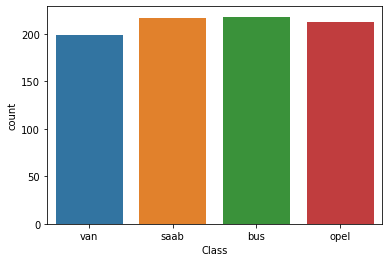

Correlation Analysis of Vehicle dataset 



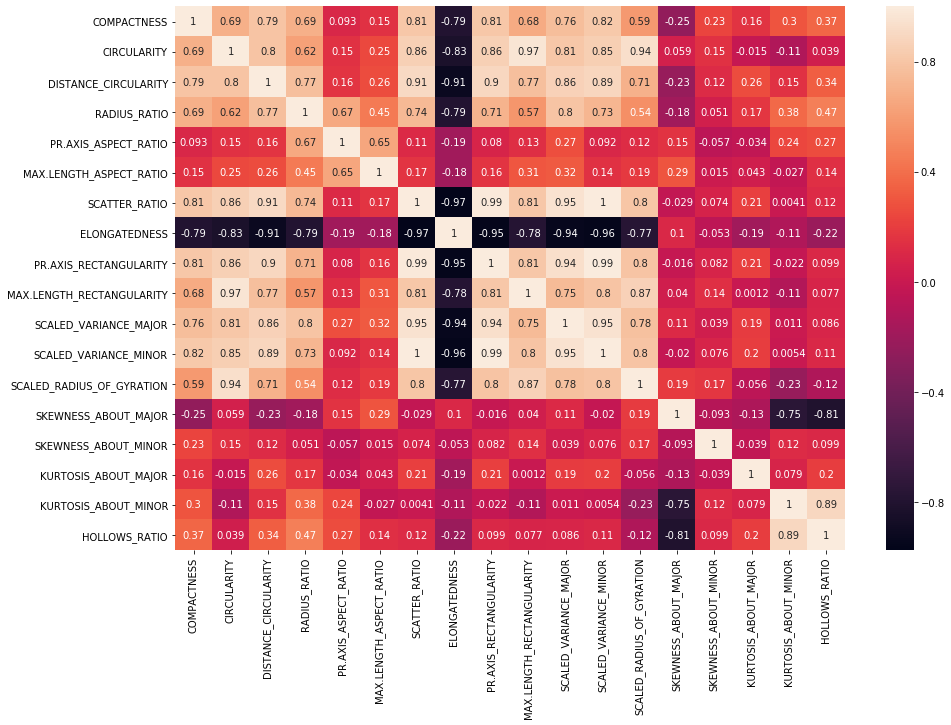

In [6]:
mod.visualization(vehicles)

The classes of vehicles in the 846 rows of data are "bus, van, saab and opel", with "van" having the least number of observations and quite a larger difference compared to the other three vehicles while "bus" has the highest occurence observed.

In order to predict the category of a vehicle given the dimensions of its features, we need to train a model that will give the highest possible accuracy based on this given data. This is a supervised learning problem, because we have labeled data. There are a lots of supervised learning algorithms, the question now is which algorithm will be fit for this task.

First, it is good to be able to identify the kind of data in the target column, that is, "Class". We are predicting a category of vehicles and not some quantity nor continuous data, this shows we are dealing with a Classification problem and not Regression (regression deals with continuous data/ non-categorical data).

Further, there are still several Classification algorithms, some of which are: Logistic Regression, Naive Bayes, KNeighbour Classifier, Support Vector Machine, Random Forest, Decision Trees, SGDClassifier, et ce tera.

In this notebook, I will test out some of these algorithms and compare their evaluation metrics to one another in order to determine the best algorithm for this dataset.

## Splitting the columns of the dataset into features and target

Something common to building all these models is splitting our dataset into train set and test set. Train set, being a larger part of the data in which I will train the model on and test set, being a part of the data used to test the built model on as to determine its accuracy/evaluation metrics.

Sckit-learn has a `train_test_split` function in its `model_selection` package, this is what I will use to split the data.
I will split the train and test data further into train_features, train_target and test_features, test_target.

`train_features` a fraction of all explanatory variables to be used in training the model

`train_target` a fraction of the target variable to be used in training the model

`test_features` a fraction of all explanatory variables used for testing the model's performance

`test_target` a part of the target variable used for testing the model's performance.


The next challenge is determining what `test_size` to use in splitting the data. I have to be careful when choosing this so I won't end up overfitting/underfitting the data into a model. The train_set should be larger than the test_set, this is because a model performs better when trained on a large amount of data, therefore the test_size should naturally not be more than 0.4/40% of the data. This leaves me with a decision to choose between test_size of 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1. 

Next, I will try out these different test_sizes on some models and pick out the one with the highest model accuracy.

In [7]:
# Results of the various model performance on different test_sizes
import tabletext

model_performance = [
    ["test_size/model", 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1],
    ["Logistic_regression(%)", 80.2, 81.8, 80.7, 81.1, 81.2, 77.2, 77.6],
    ["KNeighbours(%)", 61.1, 62.6, 63.4, 63.2, 64.7, 64.6, 63.5],
    ["RandomForest(%)", 71.1, 77.4, 76.8, 76.4, 75.3, 81.1, 72.9],
    ["Decision Tree(%)", 74.3, 71.0, 76.0, 68.9, 72.4, 70.1, 74.1],
    ["Linear Discriminant(%)", 78.8, 79.5, 79.5, 79.7, 77.1, 76.4, 77.6],
    ["Gaussian NB(%)", 41.6, 44.1, 45.7, 48.6, 50.0, 53.5, 49.4],
]
print(tabletext.to_text(model_performance))

┌────────────────────────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ test_size/model        │  0.4 │ 0.35 │  0.3 │ 0.25 │  0.2 │ 0.15 │  0.1 │
├────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Logistic_regression(%) │ 80.2 │ 81.8 │ 80.7 │ 81.1 │ 81.2 │ 77.2 │ 77.6 │
├────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ KNeighbours(%)         │ 61.1 │ 62.6 │ 63.4 │ 63.2 │ 64.7 │ 64.6 │ 63.5 │
├────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ RandomForest(%)        │ 71.1 │ 77.4 │ 76.8 │ 76.4 │ 75.3 │ 81.1 │ 72.9 │
├────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Decision Tree(%)       │ 74.3 │ 71.0 │ 76.0 │ 68.9 │ 72.4 │ 70.1 │ 74.1 │
├────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Linear Discriminant(%) │ 78.8 │ 79.5 │ 79.5 │ 79.7 │ 77.1 │ 76.4 │ 77.6 │
├────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Gaussian N

### Inference
The first row above shows the various test sizes I tried, the first column indicates the names of the different models used, the rest are a percentage of accuracy score corresponding to a test_size and a model. 

Careful observation shows that two models (Decision Tree & Linear Discriminant) are best at `test_size` of 0.3, Logistic Regression is best at 0.35 as `test_size`, KNeighbours is best at `test_size` of 0.2 with slight difference among the other test sizes while RandomForest is best at a `test_size` of 0.15 (81.1%) followed by a `test_size` of 0.35 (77.4%). 

Gaussian NB has a normally low accuracy, it is known to be a bad estimator and performs better on a small amount of training data, therefore I will exclude it from the models to be used.

The model with the an overall highest accuracy is Logistic Regression (81.8%), followed by RandomForest (81.1%), Linear Discriminant Analysis (79.7%), Decision Tree (76.0%), KNeighbours (64.7%) and the least being Gaussian NB (53.5%).


### Final Inference on test_size
I will choose my `test_size` as 0.3 as it seems to be the overall best among the others and will give a good performance of the models.

### Conclusion
I will focus more on tuning the paramters of the Logistic Regression model and Random Forest Classifier in order to achieve the highest possible accuracy.

In [8]:
train_features, test_features, train_target, test_target = mod.preprocessing(
    vehicles
)

## Evaluating the Performance of different Classification models

In [15]:
# Logistic Regression model
mod.logistic_regression_model(
    train_features, test_features, train_target, test_target
)

Cross Validation:  (0.7956214689265537, 0.056845992398749205)
Accuracy Score(%):  80.70866141732283
[[77  0  0  1]
 [ 2 32 12  1]
 [ 4 26 40  1]
 [ 0  2  0 56]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        78
           1       0.53      0.68      0.60        47
           2       0.77      0.56      0.65        71
           3       0.95      0.97      0.96        58

    accuracy                           0.81       254
   macro avg       0.79      0.80      0.79       254
weighted avg       0.82      0.81      0.80       254



In [10]:
# Kneighbours classifier model
mod.k_neighbours_classifier_model(
    train_features, test_features, train_target, test_target
)

Cross Validation:  (0.6421468926553672, 0.06855098196626402)
Accuracy Score(%):  63.38582677165354
[[63  4 10  1]
 [ 0 20 23  4]
 [ 8 32 28  3]
 [ 3  3  2 50]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        78
           1       0.34      0.43      0.38        47
           2       0.44      0.39      0.42        71
           3       0.86      0.86      0.86        58

    accuracy                           0.63       254
   macro avg       0.62      0.62      0.62       254
weighted avg       0.65      0.63      0.64       254



In [11]:
# Random Forest classifier model
mod.randomforest_classifier_model(
    train_features, test_features, train_target, test_target
)

Cross Validation:  (0.7145762711864406, 0.04473352711783903)
Accuracy Score(%):  77.16535433070865
[[78  0  0  0]
 [ 0 29 17  1]
 [ 5 28 35  3]
 [ 2  1  1 54]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        78
           1       0.50      0.62      0.55        47
           2       0.66      0.49      0.56        71
           3       0.93      0.93      0.93        58

    accuracy                           0.77       254
   macro avg       0.75      0.76      0.75       254
weighted avg       0.77      0.77      0.77       254



In [12]:
# Decision Tree Classifier model
mod.decision_tree_classifier_model(
    train_features, test_features, train_target, test_target
)

Cross Validation:  (0.7114406779661017, 0.07290273084706077)
Accuracy Score(%):  73.62204724409449
[[73  1  3  1]
 [ 2 29 16  0]
 [ 7 27 36  1]
 [ 0  3  6 49]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        78
           1       0.48      0.62      0.54        47
           2       0.59      0.51      0.55        71
           3       0.96      0.84      0.90        58

    accuracy                           0.74       254
   macro avg       0.73      0.73      0.72       254
weighted avg       0.75      0.74      0.74       254



In [13]:
# Linear Discriminant Analysis
mod.linear_discriminant_analysis_model(
    train_features, test_features, train_target, test_target
)

Cross Validation:  (0.782090395480226, 0.04988467020785669)
Accuracy Score(%):  79.52755905511812
[[76  0  0  2]
 [ 2 33 11  1]
 [ 6 27 36  2]
 [ 0  0  1 57]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        78
           1       0.55      0.70      0.62        47
           2       0.75      0.51      0.61        71
           3       0.92      0.98      0.95        58

    accuracy                           0.80       254
   macro avg       0.78      0.79      0.78       254
weighted avg       0.80      0.80      0.79       254



In [14]:
# Gaussian NB model
mod.gaussian_nb_model(train_features, test_features, train_target, test_target)

Cross Validation:  (0.44940677966101694, 0.04372174171637783)
Accuracy Score(%):  45.66929133858268
[[ 9 25  2 42]
 [ 0 20 15 12]
 [ 2 17 31 21]
 [ 1  1  0 56]]
              precision    recall  f1-score   support

           0       0.75      0.12      0.20        78
           1       0.32      0.43      0.36        47
           2       0.65      0.44      0.52        71
           3       0.43      0.97      0.59        58

    accuracy                           0.46       254
   macro avg       0.54      0.49      0.42       254
weighted avg       0.57      0.46      0.41       254



## Next Steps

Give detailed explanations for my choice of kfold score.

Explain the heatmap correlation of the entire data.

Interpret the different confusion matrix scores, this involves research as to understanding its basics.

Tune the parameters of Logistic Regression model and Random Forest Classifier model to achieve a better performance model.
